In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
df = pd.read_csv("cars.csv")
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [24]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [25]:
dimension=df.shape
print("DIMENSION=",dimension)

DIMENSION= (5076, 18)


In [26]:
numerical_columns=df.select_dtypes(include=['number'])
count=numerical_columns.shape[1]  
print(count)
numerical_columns

9


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,6,18,25,2009,250,236
1,140,143,202,6,22,28,2009,200,207
2,140,143,202,6,21,30,2009,200,207
3,140,143,202,6,21,28,2009,200,207
4,140,143,202,6,21,28,2009,200,207
...,...,...,...,...,...,...,...,...,...
5071,13,253,201,5,18,25,2012,250,253
5072,141,249,108,6,12,20,2012,552,398
5073,160,249,108,6,12,20,2012,552,398
5074,200,210,110,6,17,25,2012,315,330


In [27]:
categorical_columns=df.select_dtypes(include=['object', 'category'])
count=categorical_columns.shape  
print(count)
categorical_columns

(5076, 8)


,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Transmission,Fuel Information.Fuel Type,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year
0,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3
1,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3
2,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6 Speed Manual,Gasoline,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3
3,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3
4,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3
...,...,...,...,...,...,...,...,...
5071,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,5 Speed Automatic,Gasoline,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot
5072,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,6 Speed Manual,Gasoline,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup
5073,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,6 Speed Manual,Gasoline,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder
5074,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series


In [28]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


In [29]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

duplicate_rows = df[duplicates]
print("Duplicate rows:\n", duplicate_rows)

Number of duplicate rows: 18
Duplicate rows:
       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
4                   140                143               202   
121                  35                150                52   
1389                212                108               135   
2203                112                 22               181   
2343                148                 98                57   
3569                133                176               237   
3570                143                176               237   
3640                112                140               181   
3703                145                202               224   
3704                125                 36               166   
3705                148                 51               226   
4197                 95                253               212   
4208                143                253               212   
4313                138                 36               2

In [30]:
# Remove duplicate rows and keep the first occurrence
df = df.drop_duplicates()
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [31]:
df.dtypes

Dimensions.Height                                   int64
Dimensions.Length                                   int64
Dimensions.Width                                    int64
Engine Information.Driveline                       object
Engine Information.Engine Type                     object
Engine Information.Hybrid                            bool
Engine Information.Number of Forward Gears          int64
Engine Information.Transmission                    object
Fuel Information.City mpg                           int64
Fuel Information.Fuel Type                         object
Fuel Information.Highway mpg                        int64
Identification.Classification                      object
Identification.ID                                  object
Identification.Make                                object
Identification.Model Year                          object
Identification.Year                                 int64
Engine Information.Engine Statistics.Horsepower     int64
Engine Informa

In [32]:
num_cols=['Dimensions.Height','Dimensions.Length','Dimensions.Width',
          'Engine Information.Number of Forward Gears','Fuel Information.City mpg',
         'Fuel Information.Highway mpg','Identification.Year','Engine Information.Engine Statistics.Horsepower',
         'Engine Information.Engine Statistics.Torque']

cat_cols=['Engine Information.Driveline','Engine Information.Engine Type',
         'Engine Information.Transmission','Fuel Information.Fuel Type',
         'Identification.Classification','Identification.ID','Identification.Make','Identification.Model Year']

boolean_cols=['Engine Information.Hybrid']
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [33]:
#Checking outliers
for i in num_cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lowerbound=q1-1.5*iqr
    upperbound=q3+1.5*iqr
    df=df[(df[i]>=lowerbound) & (df[i]<=upperbound)]
df# outlier rows removed

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [34]:
df.nunique()

Dimensions.Height                                   189
Dimensions.Length                                   202
Dimensions.Width                                    130
Engine Information.Driveline                          4
Engine Information.Engine Type                      468
Engine Information.Hybrid                             1
Engine Information.Number of Forward Gears            4
Engine Information.Transmission                      10
Fuel Information.City mpg                            22
Fuel Information.Fuel Type                            4
Fuel Information.Highway mpg                         30
Identification.Classification                         2
Identification.ID                                  4768
Identification.Make                                  43
Identification.Model Year                           828
Identification.Year                                   4
Engine Information.Engine Statistics.Horsepower     188
Engine Information.Engine Statistics.Torque     

In [35]:
df=df.drop(columns=['Engine Information.Hybrid'])
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [36]:
df[cat_cols].nunique()

Engine Information.Driveline          4
Engine Information.Engine Type      468
Engine Information.Transmission      10
Fuel Information.Fuel Type            4
Identification.Classification         2
Identification.ID                  4768
Identification.Make                  43
Identification.Model Year           828
dtype: int64

In [37]:
#Now we will encode categorical data .
#target encoding for the 4 highest values
target='Fuel Information.City mpg'
target_columns = [
    'Engine Information.Engine Type',
    'Engine Information.Transmission',
    'Identification.Model Year',
    'Identification.ID',
    'Identification.Make'
]

for i in target_columns:
    df[i]=df.groupby(i)[target].transform('mean')
    
# onehot encoding for low cardinality features

onehot_columns = ['Engine Information.Driveline',
    'Fuel Information.Fuel Type',
    'Identification.Classification']
df=pd.get_dummies(df,columns=onehot_columns)

In [38]:
bool_to_num_cols=['Engine Information.Driveline_All-wheel drive',
                  'Engine Information.Driveline_Four-wheel drive',
                 'Engine Information.Driveline_Front-wheel drive',
                 'Engine Information.Driveline_Rear-wheel drive',
                 'Fuel Information.Fuel Type_Compressed natural gas',
                 'Fuel Information.Fuel Type_Diesel fuel',
                 'Fuel Information.Fuel Type_E85',
                 'Fuel Information.Fuel Type_Gasoline',
                 'Identification.Classification_Automatic transmission',
                 'Identification.Classification_Manual transmission']
df[bool_to_num_cols]=df[bool_to_num_cols].astype(int)

In [39]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.ID,Identification.Make,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,140,143,202,18.000000,6,17.074662,18,25,18.0,17.431034,...,1,0,0,0,0,0,0,1,1,0
1,140,143,202,21.166667,6,17.074662,22,28,22.0,17.431034,...,0,0,1,0,0,0,0,1,1,0
2,140,143,202,21.166667,6,18.868778,21,30,21.0,17.431034,...,0,0,1,0,0,0,0,1,0,1
3,140,143,202,21.166667,6,17.074662,21,28,21.0,17.431034,...,1,0,0,0,0,0,0,1,1,0
5,91,17,62,17.000000,6,18.868778,16,27,16.0,17.431034,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,3,253,201,16.800000,5,15.626340,18,25,18.0,21.800000,...,0,0,1,0,0,0,0,1,1,0
5070,3,253,201,16.800000,5,15.626340,17,24,17.0,21.800000,...,0,1,0,0,0,0,0,1,1,0
5071,13,253,201,16.800000,5,15.626340,18,25,18.0,21.800000,...,0,0,1,0,0,0,0,1,1,0
5074,200,210,110,17.000000,6,17.074662,17,25,17.0,16.489796,...,0,0,0,1,0,0,0,1,1,0


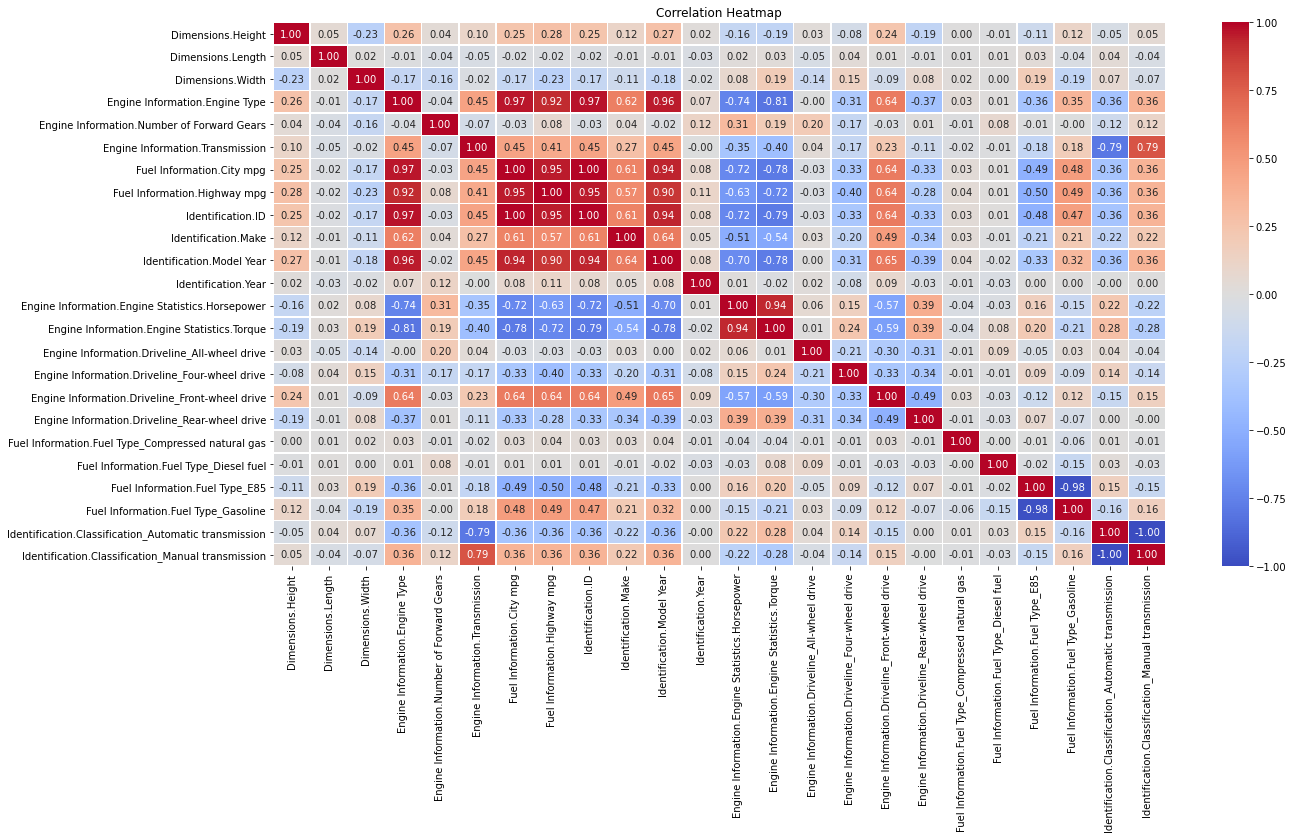

In [40]:
import seaborn as sns
corr_matrix=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### FEATURE SCALING

In [41]:
scaler=MinMaxScaler()
df[df.select_dtypes(include='number').columns]=scaler.fit_transform(df[df.select_dtypes(include='number').columns])
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.ID,Identification.Make,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,0.545455,0.557312,0.794466,0.463415,0.666667,0.240283,0.476190,0.482759,0.476190,0.424175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.545455,0.557312,0.794466,0.617886,0.666667,0.240283,0.666667,0.586207,0.666667,0.424175,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.545455,0.557312,0.794466,0.617886,0.666667,0.489321,0.619048,0.655172,0.619048,0.424175,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.545455,0.557312,0.794466,0.617886,0.666667,0.240283,0.619048,0.586207,0.619048,0.424175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.351779,0.059289,0.241107,0.414634,0.666667,0.489321,0.380952,0.551724,0.380952,0.424175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,0.003953,0.992095,0.790514,0.404878,0.333333,0.039243,0.476190,0.482759,0.476190,0.712340,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5070,0.003953,0.992095,0.790514,0.404878,0.333333,0.039243,0.428571,0.448276,0.428571,0.712340,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5071,0.043478,0.992095,0.790514,0.404878,0.333333,0.039243,0.476190,0.482759,0.476190,0.712340,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5074,0.782609,0.822134,0.430830,0.414634,0.666667,0.240283,0.428571,0.482759,0.428571,0.362093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Feature Selection

In [42]:
df.columns

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Engine Type',
       'Engine Information.Number of Forward Gears',
       'Engine Information.Transmission', 'Fuel Information.City mpg',
       'Fuel Information.Highway mpg', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque',
       'Engine Information.Driveline_All-wheel drive',
       'Engine Information.Driveline_Four-wheel drive',
       'Engine Information.Driveline_Front-wheel drive',
       'Engine Information.Driveline_Rear-wheel drive',
       'Fuel Information.Fuel Type_Compressed natural gas',
       'Fuel Information.Fuel Type_Diesel fuel',
       'Fuel Information.Fuel Type_E85', 'Fuel Information.Fuel Type_Gasoline',
       'Identification.Classification_Automatic transmission',
       'Identification.Classi

Using RFE method

In [43]:
X = df.drop('Fuel Information.City mpg', axis=1)# storing independent variables
y = df['Fuel Information.City mpg'] #target variable

#creating objects for ridge and rfe
ridge = Ridge()
rfe = RFE(ridge, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['Engine Information.Engine Type', 'Fuel Information.Highway mpg',
       'Identification.ID', 'Identification.Model Year',
       'Fuel Information.Fuel Type_E85'],
      dtype='object')


In [44]:
#vif
selected_features = ['Engine Information.Engine Type', 'Fuel Information.Highway mpg',
       'Identification.ID',
       'Identification.Model Year',
       'Fuel Information.Fuel Type_E85']

X = df[selected_features]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                          Feature         VIF
0  Engine Information.Engine Type  153.036549
1    Fuel Information.Highway mpg   62.119350
2               Identification.ID  179.245052
3       Identification.Model Year   51.423572
4  Fuel Information.Fuel Type_E85    1.282206


In [ ]:
#here Fuel Information.Fuel Type_E85 has vif value near to 1, ie, less multicollinearity, ie ,less correlation. less correaltion means best for training
#So now VIF values of other 4 features should be reduced using PCA

In [45]:
# Extract features with high VIF
high_vif_features = ['Engine Information.Engine Type', 'Fuel Information.Highway mpg']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df[high_vif_features])

# Create a new column in the DataFrame for the PCA component
df['PCA_Enginetype_highway'] = X_pca

# Drop the original correlated features
df = df.drop(columns=high_vif_features)

print("Transformed DataFrame with PCA feature added:")
df.head()

Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,...,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission,PCA_Enginetype_highway
0,0.545455,0.557312,0.794466,0.666667,0.240283,0.476190,0.476190,0.424175,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.046236
1,0.545455,0.557312,0.794466,0.666667,0.240283,0.666667,0.666667,0.424175,0.555556,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.229242
2,0.545455,0.557312,0.794466,0.666667,0.489321,0.619048,0.619048,0.424175,0.555556,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.277108
3,0.545455,0.557312,0.794466,0.666667,0.240283,0.619048,0.619048,0.424175,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.229242
5,0.351779,0.059289,0.241107,0.666667,0.489321,0.380952,0.380952,0.424175,0.346405,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.058985


In [46]:
# Extract features with high VIF
high_vif_features1 = ['Identification.ID', 'Identification.Model Year']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df[high_vif_features1])

# Create a new column in the DataFrame for the PCA component
df['PCA_ID_ModelYear'] = X_pca

# Drop the original correlated features
df = df.drop(columns=high_vif_features1)

print("Transformed DataFrame with PCA feature added:")
df.head()


Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission,PCA_Enginetype_highway,PCA_ID_ModelYear
0,0.545455,0.557312,0.794466,0.666667,0.240283,0.476190,0.424175,0.0,0.3750,0.318707,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.046236,0.143289
1,0.545455,0.557312,0.794466,0.666667,0.240283,0.666667,0.424175,0.0,0.2500,0.251732,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.229242,0.275573
2,0.545455,0.557312,0.794466,0.666667,0.489321,0.619048,0.424175,0.0,0.2500,0.251732,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.277108,0.242502
3,0.545455,0.557312,0.794466,0.666667,0.240283,0.619048,0.424175,0.0,0.2500,0.251732,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.229242,0.242502
5,0.351779,0.059289,0.241107,0.666667,0.489321,0.380952,0.424175,0.0,0.4125,0.334873,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.058985,-0.073337


In [47]:
selected_features = ['PCA_Enginetype_highway',
       'PCA_ID_ModelYear',
       'Fuel Information.Fuel Type_E85']

X = df[selected_features]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                          Feature        VIF
0          PCA_Enginetype_highway  23.623078
1                PCA_ID_ModelYear  23.140748
2  Fuel Information.Fuel Type_E85   1.208917


In [ ]:
#Now again do pca as 1st 2 have high VIF values

In [48]:
# Extract features with high VIF
high_vif_features2 = ['PCA_Enginetype_highway', 'PCA_ID_ModelYear']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df[high_vif_features2])

# Create a new column in the DataFrame for the PCA component
df['PCA_final'] = X_pca

# Drop the original correlated features
df = df.drop(columns=high_vif_features2)

print("Transformed DataFrame with PCA feature added:")
df.head()


Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission,PCA_final
0,0.545455,0.557312,0.794466,0.666667,0.240283,0.476190,0.424175,0.0,0.3750,0.318707,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.135566
1,0.545455,0.557312,0.794466,0.666667,0.240283,0.666667,0.424175,0.0,0.2500,0.251732,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.357621
2,0.545455,0.557312,0.794466,0.666667,0.489321,0.619048,0.424175,0.0,0.2500,0.251732,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.366755
3,0.545455,0.557312,0.794466,0.666667,0.240283,0.619048,0.424175,0.0,0.2500,0.251732,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.333701
5,0.351779,0.059289,0.241107,0.666667,0.489321,0.380952,0.424175,0.0,0.4125,0.334873,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.012311


In [49]:
selected_features = ['Fuel Information.Fuel Type_E85',
       'PCA_final']

X = df[selected_features]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                          Feature       VIF
0  Fuel Information.Fuel Type_E85  1.192972
1                       PCA_final  1.192972


In [ ]:
#Since VIF is near to 1, it shows less multicollinearity(independence)
#Now check the linearity

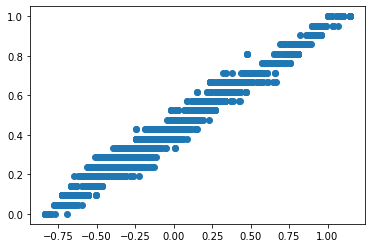

In [50]:
x=df['PCA_final']
y=df['Fuel Information.City mpg']
plt.scatter(x,y)

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

X=df[['PCA_final','Fuel Information.Fuel Type_E85']] 
Y=df[['Fuel Information.City mpg']]

model.fit(X,Y)
pred=model.predict(X)

In [53]:
from sklearn.metrics import r2_score
r2_score_value = r2_score(Y, pred)
print(r2_score_value) #high r^2 means better model

0.9814751698519412


In [ ]:
#checking for homoscedasticity

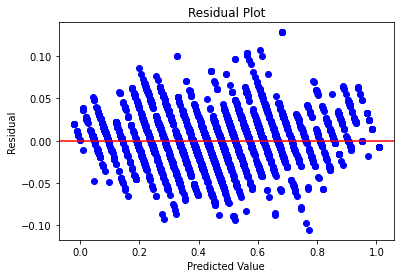

In [54]:
error=Y-pred
plt.scatter(pred,error,color='b')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.axhline(y=0,color='r')

# Conclusion

Hence multiple linear regression is performed with Fuel Information.City mpg as the target variable. Assumptions of Linear Regression model like multicollinearity,linearity and homoscedasticity are verified and a model is trained.